**1. Import Libraries & Load Dataset**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [12]:
df = pd.read_csv('/content/Housing.csv')

In [13]:
print(df.head())
print(df.info())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 colu

**2. Encode Categorical Variables**

In [14]:
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
df[binary_cols] = df[binary_cols].apply(lambda x: x.map({'yes': 1, 'no': 0}))

df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

print(df.head())

      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfurnished  
0                            False                         False  
1                       

**3. Split Features and Target**

In [6]:
y = df['price']

X_simple = df[['area']]

X_multiple = df.drop('price', axis=1)


**4. Train-Test Split**

In [7]:
# For simple regression
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

# For multiple regression
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multiple, y, test_size=0.2, random_state=42)

**5. Train Models**

In [8]:
# Simple
model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)

# Multiple
model_multiple = LinearRegression()
model_multiple.fit(X_train_m, y_train_m)

LinearRegression()

**6. Make Predictions and Evaluate**

In [9]:
# Simple
y_pred_s = model_simple.predict(X_test_s)
print("Simple Linear Regression:")
print("MAE:", mean_absolute_error(y_test_s, y_pred_s))
print("MSE:", mean_squared_error(y_test_s, y_pred_s))
print("R² Score:", r2_score(y_test_s, y_pred_s))

# Multiple
y_pred_m = model_multiple.predict(X_test_m)
print("\nMultiple Linear Regression:")
print("MAE:", mean_absolute_error(y_test_m, y_pred_m))
print("MSE:", mean_squared_error(y_test_m, y_pred_m))
print("R² Score:", r2_score(y_test_m, y_pred_m))

Simple Linear Regression:
MAE: 1474748.1337969352
MSE: 3675286604768.185
R² Score: 0.27287851871974644

Multiple Linear Regression:
MAE: 970043.4039201637
MSE: 1754318687330.6633
R² Score: 0.6529242642153185


**7. Plot (for Simple Linear Regression)**

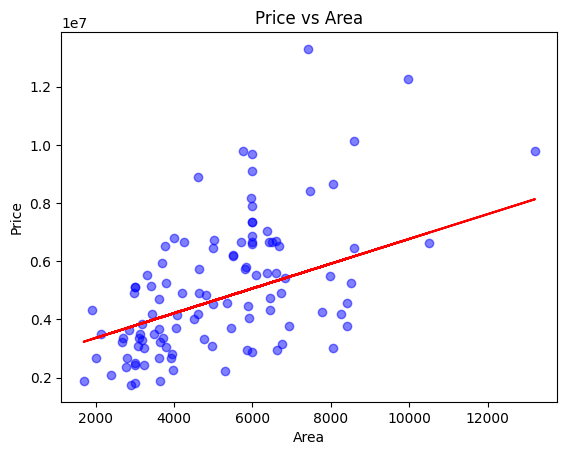

In [10]:
# Simple regression line
plt.scatter(X_test_s, y_test_s, color='blue', alpha=0.5)
plt.plot(X_test_s, y_pred_s, color='red')
plt.title('Price vs Area')
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()

**8. Model Coefficients (Multiple Regression)**

In [11]:
# Coefficient interpretation
coeff_df = pd.DataFrame(model_multiple.coef_, X_multiple.columns, columns=['Coefficient'])
print(coeff_df)

                                  Coefficient
area                             2.359688e+02
bedrooms                         7.677870e+04
bathrooms                        1.094445e+06
stories                          4.074766e+05
mainroad                         3.679199e+05
guestroom                        2.316100e+05
basement                         3.902512e+05
hotwaterheating                  6.846499e+05
airconditioning                  7.914267e+05
parking                          2.248419e+05
prefarea                         6.298906e+05
furnishingstatus_semi-furnished -1.268818e+05
furnishingstatus_unfurnished    -4.136451e+05
